#### Breast Cancer Data

In [81]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("../data/breast_cancer.txt", delim_whitespace=True)
df.head()

C:\Users\ryans\AppData\Local\Temp\ipykernel_37836\1437134383.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("../data/breast_cancer.txt", delim_whitespace=True)


,clump_thickness,cell_shape_uniformity,cell_size_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [6]:
# use only mitoses and clump_thickeness
df = df[['mitoses', 'clump_thickness', 'class']]

In [7]:
df.head()

,mitoses,clump_thickness,class
0,1,5,0
1,1,5,0
2,1,3,0
3,1,6,0
4,1,4,0


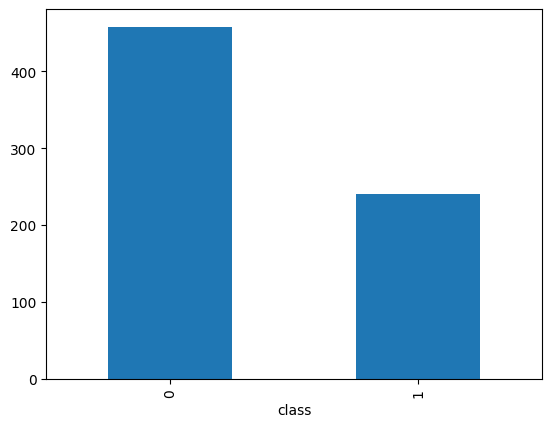

In [8]:
import matplotlib.pyplot as plt
graph = df['class'].value_counts()
graph.plot(kind = 'bar')
plt.show()

Categorize the values for mitoses as follows:
+ low = 1
+ high = 2-10

In [9]:
def categorize_mitoses(mitoses):
    if mitoses == 1:
        return 'low'
    else:
        return 'high'

In [10]:
df['mitoses'] = df['mitoses'].apply(categorize_mitoses)

Find the prior probabilities for each predictor variable and target variable. Then, find the compliments.

In [11]:
def categorize_thickness(clump_thickness):
    '''Low = 1-5 and High = 6-10'''
    if clump_thickness <= 5:
        return 'low'
    else:
        return 'high'

In [12]:
df['clump_thickness'] = df['clump_thickness'].apply(categorize_thickness)

In [13]:
df

,mitoses,clump_thickness,class
0,low,low,0
1,low,low,0
2,low,low,0
3,low,high,0
4,low,low,0
...,...,...,...
694,low,low,0
695,low,low,0
696,high,low,1
697,low,low,1


##### Prior Probabilities

First, we will establish the prior probabilities for low mitoses, low clump thickness, and malignant tumors.
+ p(Low Mitoses)
+ p(Low Clump Thickness)
+ p(Cancer - class = 0)

In [14]:
# function to calculate priors
def prior(col, outcome) -> float:
    '''Find the prior probabilities'''
    prior = df[col].value_counts(normalize = True)
    prior_probability = round(prior[outcome], 4)
    return prior_probability

    

In [15]:
# low mitosis prior
low_mitoses_prior = prior('mitoses', 'low')
low_mitoses_prior

np.float64(0.8283)

In [16]:
# low clump thickness prior
low_clump_prior = prior('clump_thickness', 'low')
low_clump_prior

np.float64(0.7339)

In [17]:
# breast cancer prior
breast_cancer_prior = prior('class', 1)
breast_cancer_prior

np.float64(0.3448)

Complements can be found using the same function or subtracting the value from 1.

In [18]:
# complements of priors
high_mitoses_prior = 1 - low_mitoses_prior
high_clump_thickness_prior = 1 - low_clump_prior
no_cancer_prior = 1 - breast_cancer_prior

##### Conditional Probabilities Given No Cancer (class = 1)

+ p(LM | 1)
+ p(LC | 1)

This can easily be done by subsetting the dataset into only those who are malignant and those who are benign.

In [19]:
# separate the classes
class_0 = df[df['class'] == 0]
class_1 = df[df['class'] == 1]

Given Malignant

In [20]:
# now get probability of high mitoses and high clump thickness. 
given_malignant_mitoses = class_1['mitoses'].value_counts(normalize=True)
low_mitoses_given_malignant = round(given_malignant_mitoses['low'], 4)

given_malignant_clump = class_1['clump_thickness'].value_counts(normalize=True)
low_clump_given_malignant = round(given_malignant_clump['low'], 4)

In [21]:
low_mitoses_given_malignant

np.float64(0.556)

In [22]:
low_clump_given_malignant

np.float64(0.3154)

In [23]:
high_mitoses_given_malignant = round(1 - low_mitoses_given_malignant, 4)
high_mitoses_given_malignant

np.float64(0.444)

In [24]:
high_clump_given_malignant = round(1 - low_clump_given_malignant, 4)
high_clump_given_malignant

np.float64(0.6846)

Given Benign

When we calculate these conditional probabilities we can start to get a sense of the data. From the following conditional probabilities we see that benign tumors are very likely to have low mitoses and low clump thickness.

In [25]:
mitoses_given_benign = class_0['mitoses'].value_counts(normalize=True)
mitoses_given_benign

mitoses
low     0.971616
high    0.028384
Name: proportion, dtype: float64

In [26]:
clump_given_benign = class_0['clump_thickness'].value_counts(normalize=True)
clump_given_benign

clump_thickness
low     0.954148
high    0.045852
Name: proportion, dtype: float64

In [27]:
low_mitoses_given_benign = mitoses_given_benign['low']
high_mitoses_given_benign = mitoses_given_benign['high']

In [28]:
low_clump_given_benign = clump_given_benign['low']
high_clump_given_benign = clump_given_benign['high']

#### Probability of Malignant Tumor Given Mitoses is Low and High

p(Class = 1 | Mitoses Low)

First, construct the dataframe for all values where mitoses is low. Once we have this subset of data we can calculate the probability for malignant tumor given mitoses is low. The probability that a tumor is malignant given low mitoses is 0.23. This dataframe can also tell us the probability of a benign tumor given mitoses is low but it cannot tell us the probability when mitoses is high.

In [29]:
# low mitoses
low_mitoses = df[df['mitoses'] == 'low']

In [30]:
# out of those with low mitoses, what is the probability of class = 1?
class_given_low_mitoses = low_mitoses['class'].value_counts(normalize='True')
class_given_low_mitoses

class
0    0.768566
1    0.231434
Name: proportion, dtype: float64

In [31]:
# probability of malignant tumor given low mitoses
malignant_given_low_mitoses = class_given_low_mitoses[1]
benign_given_low_mitoses = class_given_low_mitoses[0]

In [32]:
# same process for high mitoses
high_mitoses = df[df['mitoses'] == 'high']
class_given_high_mitoses = high_mitoses['class'].value_counts(normalize=True)
class_given_high_mitoses

class
1    0.891667
0    0.108333
Name: proportion, dtype: float64

In [33]:
# probability of malignant given high mitosesS
malignant_given_high_mitoses = class_given_high_mitoses[1]
benign_given_high_mitoses = class_given_high_mitoses[0]

In [34]:
# clump thickness
low_clump = df[df['clump_thickness'] == 'low']
class_given_low_clump = low_clump['class'].value_counts(normalize=True)
class_given_low_clump
 

class
0    0.851852
1    0.148148
Name: proportion, dtype: float64

In [35]:
malignant_given_low_clump = class_given_low_clump[1]
benign_given_low_clump = class_given_low_clump[0]

In [36]:
high_clump = df[df['clump_thickness'] == 'high']
class_given_high_clump = high_clump['class'].value_counts(normalize=True)
malignant_given_high_clump = class_given_high_clump[1]
benign_given_high_clump = class_given_high_clump[0]

#### Bayes Classifier

New patient with **low mitoses** and **low clump thickness**. The naive bayes classifier would classify this patient as benign with a normalized posterior probability of benign = 0.91 and malignant = 0.09. The posterior odds ratio of 0.1 tells us that the odds of being malignant are only 0.1 times that of the tumor being benign so we are confident that this tumor with low mitoses and low clump thickness is benign.

In [37]:
# malignant unnormalized posterior probability
mal = low_mitoses_given_malignant * low_clump_given_malignant * breast_cancer_prior
mal

np.float64(0.06046495552000001)

In [38]:
# benign unnormalized posterior probability
ben = low_mitoses_given_benign * low_clump_given_benign * no_cancer_prior
ben

np.float64(0.6074134169828951)

In [39]:
# get normalized posterior probabilities
normalize = mal + ben
mal_proba = mal / normalize
ben_proba = ben / normalize

In [40]:
# malignant normalized posterior probability
mal_proba

np.float64(0.09053288444332416)

In [41]:
# benign normalized posterior probability
ben_proba

np.float64(0.9094671155566759)

In [42]:
# posterior odds ratio
mal / ben

np.float64(0.09954497847666528)

##### Both High Takeaways

Posterior Odds Ratio for Both High


Relative Likelihood:

+ The posterior odds ratio of 122 means that given the observed data, the odds of the tumor being malignant are 122 times greater than the odds of it being benign.

Confidence in Classification:

+ Such a high odds ratio strongly favors the malignant class. This indicates that, based on the features and the probabilities used, the model is highly confident that the tumor is malignant.

In [43]:
# both high
mal_both_high = high_mitoses_given_malignant * high_clump_given_malignant * breast_cancer_prior
ben_both_high = high_mitoses_given_benign * high_clump_given_benign * no_cancer_prior

In [44]:
mal_both_high

np.float64(0.10480623552000001)

In [45]:
ben_both_high

np.float64(0.0008527182929387311)

In [46]:
normalize_both_high = mal_both_high + ben_both_high
mal_proba = mal_both_high / normalize_both_high
ben_proba = ben_both_high / normalize_both_high

In [47]:
mal_proba

np.float64(0.9919295217095524)

In [48]:
ben_proba

np.float64(0.008070478290447632)

In [49]:
mal_both_high / ben_both_high

np.float64(122.90839353147368)

##### Mitoses High and Clump Thickness Low

In [50]:
# mitoses high and clump thickness low
mal_mitoses_high = high_mitoses_given_malignant * low_clump_given_malignant * breast_cancer_prior
ben_mitoses_high = high_mitoses_given_benign * low_clump_given_benign * no_cancer_prior

In [51]:
mal_mitoses_high

np.float64(0.048284964480000005)

In [52]:
ben_mitoses_high

np.float64(0.017744661619725023)

In [53]:
normalize_mal_high = mal_mitoses_high + ben_mitoses_high
mal_proba_mitoses_high = mal_mitoses_high / normalize_mal_high
ben_proba_mitoses_high = ben_mitoses_high / normalize_mal_high

In [54]:
mal_proba_mitoses_high

np.float64(0.7312621217493321)

In [55]:
ben_proba_mitoses_high

np.float64(0.2687378782506678)

The posterior odds ratio for a patient with high mitoses and low clump thickness tells us that a person with these values is 2.72 times as likely to have a malignant tumor than a benign tumor.

In [56]:
# posterior odds ratio for mitoses high and clump thickness low
mal_mitoses_high / ben_mitoses_high

np.float64(2.7210980696485234)

##### Mitoses Low and Clump Thickness High

In [57]:
# mitoses high and clump thickness low
mal_clump_high = low_mitoses_given_malignant * high_clump_given_malignant * breast_cancer_prior
ben_clump_high = low_mitoses_given_benign * high_clump_given_benign * no_cancer_prior

In [58]:
# unnormalized posterior probability
mal_clump_high

np.float64(0.13124384448)

In [59]:
# unnormalized posterior probability
ben_clump_high

np.float64(0.029189203104441182)

In [60]:
# normalize the values
normalize_clump_high = mal_clump_high + ben_clump_high
mal_proba_clump_high = mal_clump_high / normalize_clump_high
ben_proba_clump_high = ben_clump_high / normalize_clump_high

In [61]:
mal_proba_clump_high

np.float64(0.8180599100750864)

In [62]:
ben_proba_clump_high

np.float64(0.18194008992491367)

The posterior odds ratio tells us that a patient with low mitoses and high clump thickness is 4.5 times as likely to have a malignant tumor than benign tumor.

In [63]:
# posterior odds ratio
mal_clump_high / ben_clump_high

np.float64(4.496314750711062)

#### Log Posterior Odds Ratios

A negative number for low mitoses suggests that low mitoses contributes more toward the benign class while a positive number for high mitoses tells us that a high mitoses contributes more toward the malignant class.

Magnitude of the Log-Odds Ratio:

A log-odds ratio of 2.75 means that the odds of the tumor being malignant, given high mitoses, are 
𝑒^ 2.75 times the odds of the tumor being benign, given high mitoses.

Calculation:
+ Odds Ratio
=
𝑒^2.75
≈
15.64
This means the presence of high mitoses increases the odds of the tumor being malignant by approximately 15.64 times compared to being benign.

In [64]:
# log posterior odds ratio for low mitoses 
np.log(low_mitoses_given_malignant / low_clump_given_benign)

NameError: name 'np' is not defined

In [ ]:
# log posterior odds ratio for high mitoses
np.log(high_mitoses_given_malignant / high_mitoses_given_benign)

np.float64(2.749989110102736)

##### Log posterior odds for clump thickness

Since both variables have such high log posterior odds we can say that they are both strong predictors for classifying tumors as benign or malignant.

In [ ]:
# high clump thickness
np.log(high_clump_given_malignant / high_clump_given_benign)

np.float64(2.70342619350471)

In [ ]:
# low clump thickness
np.log(low_clump_given_malignant / low_clump_given_benign)

np.float64(-1.106977615434604)

In [ ]:
import math
math.exp(2.75)

15.642631884188171

In [ ]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()

In [66]:
df['mitoses'] = df['mitoses'].map({'low': 0, 'high': 1})
df['clump_thickness'] = df['clump_thickness'].map({'low': 0, 'high': 1})

In [67]:
df

,mitoses,clump_thickness,class
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
694,0,0,0
695,0,0,0
696,1,0,1
697,0,0,1


In [68]:
X = df[['mitoses', 'clump_thickness']]

In [69]:
X

,mitoses,clump_thickness
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,0
697,0,0


In [70]:
y = df['class']

In [71]:
model.fit(X, y)

BernoulliNB()

In [73]:
import numpy as np

In [79]:
new_sample = np.array([[1, 1]])
model.predict_proba(new_sample)

c:\Users\ryans\Documents\Data Mining Hardcover\naive_bayes_classifier\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([[0.0090287, 0.9909713]])

In [76]:
diff_sample = np.array([[0, 0]])
model.predict(diff_sample)

c:\Users\ryans\Documents\Data Mining Hardcover\naive_bayes_classifier\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([0])